# Import some useful packages


In [1]:
# !pip install plotly
from pathlib import Path # convenient way to deal w/ paths
import plotly.graph_objects as go # creates plots
import numpy as np # standard for data processing
import pandas as pd # standard for data processing
import json # we have anomalies' timestamps in json format
import matplotlib.pyplot as plt 

# Specify paths to our data of interest

In [2]:
mapper_path='./map.csv'
mapper = pd.read_csv(mapper_path)

In [3]:
mapper

,COMM Channel Name,Target
0,IMO_NO,IMO_NO
1,VESSEL NAME,VESSEL NAME
2,UTC DATE,UTC DATE
3,LATITUDE,LATITUDE
4,LONGITUDE,LONGITUDE
...,...,...
214,M/E FO IN DENSITY AT 15 (g/cc),NaN
215,M/E FO IN DENSITY AT FLOW (g/cc),NaN
216,"M/E FOC (FOR ADMIN, SIMS) (MT/day)",NaN
217,BACK WASH FLOW (L/h),NaN


In [4]:
COMM_CN = list(mapper['COMM Channel Name'])
target= list(mapper['Target'])

In [5]:
# important paramters we are interested in
# target_parameter = COMM_CN[21:81][:8]
target_parameter = COMM_CN[21:81][:8] + COMM_CN[33:81][:8]

In [6]:
target_parameter

['M/E NO.1 CYL EXH GAS OUT T (C)',
 'M/E NO.2 CYL EXH GAS OUT T (C)',
 'M/E NO.3 CYL EXH GAS OUT T (C)',
 'M/E NO.4 CYL EXH GAS OUT T (C)',
 'M/E NO.5 CYL EXH GAS OUT T (C)',
 'M/E NO.6 CYL EXH GAS OUT T (C)',
 'M/E NO.7 CYL EXH GAS OUT T (C)',
 'M/E NO.8 CYL EXH GAS OUT T (C)',
 'M/E NO.1 CYL SCAV AIR T (C)',
 'M/E NO.2 CYL SCAV AIR T (C)',
 'M/E NO.3 CYL SCAV AIR T (C)',
 'M/E NO.4 CYL SCAV AIR T (C)',
 'M/E NO.5 CYL SCAV AIR T (C)',
 'M/E NO.6 CYL SCAV AIR T (C)',
 'M/E NO.7 CYL SCAV AIR T (C)',
 'M/E NO.8 CYL SCAV AIR T (C)']

In [7]:
# define filepath to read data
#  change the path of dataset_path, model_path and predict_path accoding to the pathes in your local computer
file_path = './31_CTS-PCC_SIMS Data(Common)_USC_201908010000_202004302359.csv'

setting_names = ['M/E LOAD (%)', 'M/E RPM (rpm)']
# col_names includes all the parameters we are interested in 
col_names = target_parameter + setting_names
all_data = pd.read_csv(file_path)
data = all_data[col_names]


In [8]:
data

,M/E NO.1 CYL EXH GAS OUT T (C),M/E NO.2 CYL EXH GAS OUT T (C),M/E NO.3 CYL EXH GAS OUT T (C),M/E NO.4 CYL EXH GAS OUT T (C),M/E NO.5 CYL EXH GAS OUT T (C),M/E NO.6 CYL EXH GAS OUT T (C),M/E NO.7 CYL EXH GAS OUT T (C),M/E NO.8 CYL EXH GAS OUT T (C),M/E NO.1 CYL SCAV AIR T (C),M/E NO.2 CYL SCAV AIR T (C),M/E NO.3 CYL SCAV AIR T (C),M/E NO.4 CYL SCAV AIR T (C),M/E NO.5 CYL SCAV AIR T (C),M/E NO.6 CYL SCAV AIR T (C),M/E NO.7 CYL SCAV AIR T (C),M/E NO.8 CYL SCAV AIR T (C),M/E LOAD (%),M/E RPM (rpm)
0,307.0,303.0,299.0,291.0,290.0,295.0,309.0,291.0,54.0,57.0,58.0,58.0,57.0,56.0,56.0,55.0,19.305019,62.0
1,307.0,301.0,299.0,289.0,290.0,293.0,311.0,292.0,54.0,57.0,58.0,58.0,57.0,56.0,56.0,54.0,19.305019,61.0
2,306.0,303.0,298.0,293.0,286.0,293.0,310.0,291.0,54.0,57.0,58.0,58.0,57.0,56.0,56.0,54.0,19.305019,61.0
3,308.0,304.0,298.0,291.0,288.0,293.0,312.0,290.0,54.0,57.0,58.0,58.0,57.0,56.0,56.0,55.0,19.305019,62.0
4,311.0,303.0,299.0,292.0,289.0,293.0,310.0,292.0,54.0,57.0,58.0,58.0,57.0,56.0,56.0,54.0,19.305019,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6550,43.0,46.0,49.0,50.0,51.0,52.0,52.0,51.0,55.0,68.0,69.0,69.0,69.0,69.0,69.0,64.0,0.000000,0.0
6551,44.0,46.0,46.0,53.0,51.0,53.0,53.0,53.0,54.0,63.0,63.0,69.0,69.0,69.0,69.0,64.0,0.000000,0.0
6552,34.0,46.0,46.0,47.0,51.0,54.0,50.0,51.0,48.0,59.0,63.0,62.0,70.0,69.0,61.0,57.0,0.000000,0.0
6553,34.0,48.0,49.0,44.0,51.0,52.0,48.0,53.0,46.0,59.0,66.0,57.0,70.0,69.0,55.0,57.0,0.000000,0.0


# Data Description

In [9]:
# inspect sensor values
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
M/E NO.1 CYL EXH GAS OUT T (C),6506.0,315.233323,87.322468,34.0,322.000000,349.000000,359.00000,419.000000
M/E NO.2 CYL EXH GAS OUT T (C),6506.0,325.555641,90.284451,31.0,323.000000,362.000000,373.00000,396.000000
M/E NO.3 CYL EXH GAS OUT T (C),6506.0,310.164925,84.904613,36.0,314.000000,344.000000,352.00000,379.000000
M/E NO.4 CYL EXH GAS OUT T (C),6506.0,326.563941,91.023424,39.0,318.000000,366.000000,375.00000,400.000000
M/E NO.5 CYL EXH GAS OUT T (C),6506.0,318.964802,88.720829,37.0,316.000000,356.000000,366.00000,391.000000
M/E NO.6 CYL EXH GAS OUT T (C),6506.0,317.757147,87.896725,31.0,316.000000,354.000000,364.00000,386.000000
M/E NO.7 CYL EXH GAS OUT T (C),6506.0,326.826007,89.969185,33.0,330.000000,364.000000,373.00000,402.000000
M/E NO.8 CYL EXH GAS OUT T (C),6506.0,316.762988,87.656969,34.0,316.000000,354.000000,364.00000,386.000000
M/E NO.1 CYL SCAV AIR T (C),6506.0,53.828159,3.672862,45.0,52.000000,53.000000,54.00000,70.000000
M/E NO.2 CYL SCAV AIR T (C),6506.0,56.369198,3.578937,51.0,55.000000,56.000000,56.00000,72.000000


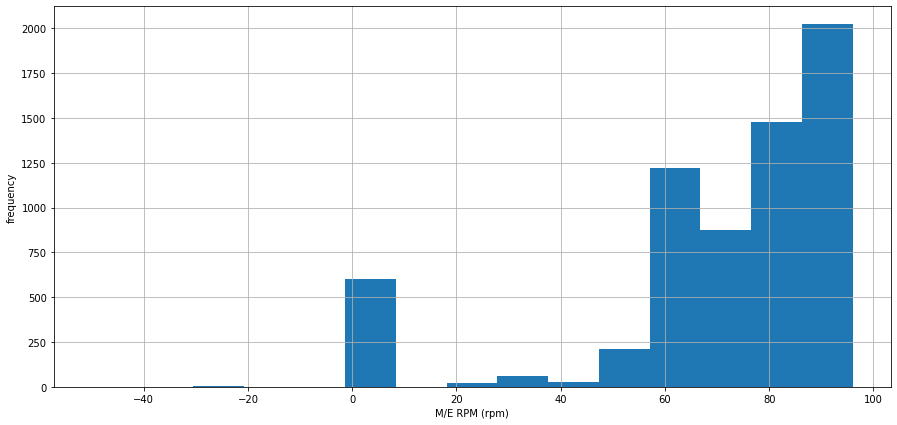

In [10]:
data['M/E RPM (rpm)'].hist(bins=15, figsize=(15,7))
plt.xlabel('M/E RPM (rpm)')
plt.ylabel('frequency')
plt.show()

# Data Preprocessing

In [11]:
standard_data = data.copy()

In [12]:
 
# it is pretty often a good idea to standardize numbers before feeding our models with data. 
# It helps them generalize better and avoid problems with different scales of values with different meanings 
# Quite often standardization just means rescaling the numbers to mean = 0 and standard deviation = 1.
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
x = standard_data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
# standard_scaler = preprocessing.StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
standard_data = pd.DataFrame(x_scaled)
standard_data.columns = col_names

In [13]:
data

,M/E NO.1 CYL EXH GAS OUT T (C),M/E NO.2 CYL EXH GAS OUT T (C),M/E NO.3 CYL EXH GAS OUT T (C),M/E NO.4 CYL EXH GAS OUT T (C),M/E NO.5 CYL EXH GAS OUT T (C),M/E NO.6 CYL EXH GAS OUT T (C),M/E NO.7 CYL EXH GAS OUT T (C),M/E NO.8 CYL EXH GAS OUT T (C),M/E NO.1 CYL SCAV AIR T (C),M/E NO.2 CYL SCAV AIR T (C),M/E NO.3 CYL SCAV AIR T (C),M/E NO.4 CYL SCAV AIR T (C),M/E NO.5 CYL SCAV AIR T (C),M/E NO.6 CYL SCAV AIR T (C),M/E NO.7 CYL SCAV AIR T (C),M/E NO.8 CYL SCAV AIR T (C),M/E LOAD (%),M/E RPM (rpm)
0,307.0,303.0,299.0,291.0,290.0,295.0,309.0,291.0,54.0,57.0,58.0,58.0,57.0,56.0,56.0,55.0,19.305019,62.0
1,307.0,301.0,299.0,289.0,290.0,293.0,311.0,292.0,54.0,57.0,58.0,58.0,57.0,56.0,56.0,54.0,19.305019,61.0
2,306.0,303.0,298.0,293.0,286.0,293.0,310.0,291.0,54.0,57.0,58.0,58.0,57.0,56.0,56.0,54.0,19.305019,61.0
3,308.0,304.0,298.0,291.0,288.0,293.0,312.0,290.0,54.0,57.0,58.0,58.0,57.0,56.0,56.0,55.0,19.305019,62.0
4,311.0,303.0,299.0,292.0,289.0,293.0,310.0,292.0,54.0,57.0,58.0,58.0,57.0,56.0,56.0,54.0,19.305019,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6550,43.0,46.0,49.0,50.0,51.0,52.0,52.0,51.0,55.0,68.0,69.0,69.0,69.0,69.0,69.0,64.0,0.000000,0.0
6551,44.0,46.0,46.0,53.0,51.0,53.0,53.0,53.0,54.0,63.0,63.0,69.0,69.0,69.0,69.0,64.0,0.000000,0.0
6552,34.0,46.0,46.0,47.0,51.0,54.0,50.0,51.0,48.0,59.0,63.0,62.0,70.0,69.0,61.0,57.0,0.000000,0.0
6553,34.0,48.0,49.0,44.0,51.0,52.0,48.0,53.0,46.0,59.0,66.0,57.0,70.0,69.0,55.0,57.0,0.000000,0.0


In [14]:
standard_data

,M/E NO.1 CYL EXH GAS OUT T (C),M/E NO.2 CYL EXH GAS OUT T (C),M/E NO.3 CYL EXH GAS OUT T (C),M/E NO.4 CYL EXH GAS OUT T (C),M/E NO.5 CYL EXH GAS OUT T (C),M/E NO.6 CYL EXH GAS OUT T (C),M/E NO.7 CYL EXH GAS OUT T (C),M/E NO.8 CYL EXH GAS OUT T (C),M/E NO.1 CYL SCAV AIR T (C),M/E NO.2 CYL SCAV AIR T (C),M/E NO.3 CYL SCAV AIR T (C),M/E NO.4 CYL SCAV AIR T (C),M/E NO.5 CYL SCAV AIR T (C),M/E NO.6 CYL SCAV AIR T (C),M/E NO.7 CYL SCAV AIR T (C),M/E NO.8 CYL SCAV AIR T (C),M/E LOAD (%),M/E RPM (rpm)
0,0.709091,0.745205,0.766764,0.698061,0.714689,0.743662,0.747967,0.730114,0.36,0.285714,0.333333,0.391304,0.40,0.384615,0.500000,0.636364,0.26087,0.767123
1,0.709091,0.739726,0.766764,0.692521,0.714689,0.738028,0.753388,0.732955,0.36,0.285714,0.333333,0.391304,0.40,0.384615,0.500000,0.606061,0.26087,0.760274
2,0.706494,0.745205,0.763848,0.703601,0.703390,0.738028,0.750678,0.730114,0.36,0.285714,0.333333,0.391304,0.40,0.384615,0.500000,0.606061,0.26087,0.760274
3,0.711688,0.747945,0.763848,0.698061,0.709040,0.738028,0.756098,0.727273,0.36,0.285714,0.333333,0.391304,0.40,0.384615,0.500000,0.636364,0.26087,0.767123
4,0.719481,0.745205,0.766764,0.700831,0.711864,0.738028,0.750678,0.732955,0.36,0.285714,0.333333,0.391304,0.40,0.384615,0.500000,0.606061,0.26087,0.760274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6550,0.023377,0.041096,0.037901,0.030471,0.039548,0.059155,0.051491,0.048295,0.40,0.809524,0.857143,0.869565,0.88,0.884615,0.933333,0.909091,0.00000,0.342466
6551,0.025974,0.041096,0.029155,0.038781,0.039548,0.061972,0.054201,0.053977,0.36,0.571429,0.571429,0.869565,0.88,0.884615,0.933333,0.909091,0.00000,0.342466
6552,0.000000,0.041096,0.029155,0.022161,0.039548,0.064789,0.046070,0.048295,0.12,0.380952,0.571429,0.565217,0.92,0.884615,0.666667,0.696970,0.00000,0.342466
6553,0.000000,0.046575,0.037901,0.013850,0.039548,0.059155,0.040650,0.053977,0.04,0.380952,0.714286,0.347826,0.92,0.884615,0.466667,0.696970,0.00000,0.342466


In [15]:
# the standard_data has 6555 rows, we split the data into training and testing datasets
train = standard_data[:5840]
test = standard_data[5840:]
# anomaly_label = standard_data[5864:]

In [16]:
# drop NAN records of the training dataset
train.isnull().values.any()

True

In [17]:
train = train.dropna()

In [18]:
train.isnull().values.any()

False

In [19]:
train

,M/E NO.1 CYL EXH GAS OUT T (C),M/E NO.2 CYL EXH GAS OUT T (C),M/E NO.3 CYL EXH GAS OUT T (C),M/E NO.4 CYL EXH GAS OUT T (C),M/E NO.5 CYL EXH GAS OUT T (C),M/E NO.6 CYL EXH GAS OUT T (C),M/E NO.7 CYL EXH GAS OUT T (C),M/E NO.8 CYL EXH GAS OUT T (C),M/E NO.1 CYL SCAV AIR T (C),M/E NO.2 CYL SCAV AIR T (C),M/E NO.3 CYL SCAV AIR T (C),M/E NO.4 CYL SCAV AIR T (C),M/E NO.5 CYL SCAV AIR T (C),M/E NO.6 CYL SCAV AIR T (C),M/E NO.7 CYL SCAV AIR T (C),M/E NO.8 CYL SCAV AIR T (C),M/E LOAD (%),M/E RPM (rpm)
0,0.709091,0.745205,0.766764,0.698061,0.714689,0.743662,0.747967,0.730114,0.36,0.285714,0.333333,0.391304,0.40,0.384615,0.500000,0.636364,0.260870,0.767123
1,0.709091,0.739726,0.766764,0.692521,0.714689,0.738028,0.753388,0.732955,0.36,0.285714,0.333333,0.391304,0.40,0.384615,0.500000,0.606061,0.260870,0.760274
2,0.706494,0.745205,0.763848,0.703601,0.703390,0.738028,0.750678,0.730114,0.36,0.285714,0.333333,0.391304,0.40,0.384615,0.500000,0.606061,0.260870,0.760274
3,0.711688,0.747945,0.763848,0.698061,0.709040,0.738028,0.756098,0.727273,0.36,0.285714,0.333333,0.391304,0.40,0.384615,0.500000,0.636364,0.260870,0.767123
4,0.719481,0.745205,0.766764,0.700831,0.711864,0.738028,0.750678,0.732955,0.36,0.285714,0.333333,0.391304,0.40,0.384615,0.500000,0.606061,0.260870,0.760274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,0.794805,0.904110,0.903790,0.908587,0.901130,0.901408,0.897019,0.903409,0.32,0.190476,0.238095,0.304348,0.32,0.269231,0.466667,0.666667,0.869565,0.952055
5836,0.807792,0.904110,0.909621,0.908587,0.892655,0.904225,0.891599,0.903409,0.32,0.190476,0.238095,0.304348,0.32,0.269231,0.466667,0.636364,0.860870,0.952055
5837,0.794805,0.904110,0.900875,0.900277,0.898305,0.909859,0.894309,0.906250,0.36,0.285714,0.285714,0.391304,0.36,0.346154,0.500000,0.666667,0.939130,0.972603
5838,0.797403,0.923288,0.903790,0.900277,0.898305,0.912676,0.888889,0.906250,0.40,0.285714,0.285714,0.391304,0.36,0.346154,0.500000,0.666667,0.956522,0.972603


In [20]:
# drop NAN records of the testing dataset
test.isnull().values.any()

True

In [21]:
test = test.dropna()

In [22]:
test

,M/E NO.1 CYL EXH GAS OUT T (C),M/E NO.2 CYL EXH GAS OUT T (C),M/E NO.3 CYL EXH GAS OUT T (C),M/E NO.4 CYL EXH GAS OUT T (C),M/E NO.5 CYL EXH GAS OUT T (C),M/E NO.6 CYL EXH GAS OUT T (C),M/E NO.7 CYL EXH GAS OUT T (C),M/E NO.8 CYL EXH GAS OUT T (C),M/E NO.1 CYL SCAV AIR T (C),M/E NO.2 CYL SCAV AIR T (C),M/E NO.3 CYL SCAV AIR T (C),M/E NO.4 CYL SCAV AIR T (C),M/E NO.5 CYL SCAV AIR T (C),M/E NO.6 CYL SCAV AIR T (C),M/E NO.7 CYL SCAV AIR T (C),M/E NO.8 CYL SCAV AIR T (C),M/E LOAD (%),M/E RPM (rpm)
5840,0.805195,0.915068,0.903790,0.908587,0.901130,0.915493,0.897019,0.920455,0.40,0.285714,0.333333,0.391304,0.36,0.346154,0.533333,0.696970,0.965217,0.979452
5841,0.802597,0.928767,0.912536,0.908587,0.895480,0.907042,0.902439,0.917614,0.40,0.285714,0.333333,0.391304,0.40,0.346154,0.533333,0.696970,0.973913,0.979452
5842,0.812987,0.923288,0.912536,0.914127,0.898305,0.904225,0.899729,0.920455,0.40,0.285714,0.333333,0.391304,0.36,0.346154,0.533333,0.666667,0.965217,0.958904
5843,0.805195,0.926027,0.906706,0.908587,0.912429,0.909859,0.902439,0.911932,0.40,0.285714,0.333333,0.391304,0.36,0.346154,0.533333,0.666667,0.947826,0.979452
5844,0.802597,0.920548,0.900875,0.911357,0.909605,0.904225,0.897019,0.911932,0.36,0.285714,0.285714,0.391304,0.36,0.346154,0.533333,0.666667,0.947826,0.972603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6550,0.023377,0.041096,0.037901,0.030471,0.039548,0.059155,0.051491,0.048295,0.40,0.809524,0.857143,0.869565,0.88,0.884615,0.933333,0.909091,0.000000,0.342466
6551,0.025974,0.041096,0.029155,0.038781,0.039548,0.061972,0.054201,0.053977,0.36,0.571429,0.571429,0.869565,0.88,0.884615,0.933333,0.909091,0.000000,0.342466
6552,0.000000,0.041096,0.029155,0.022161,0.039548,0.064789,0.046070,0.048295,0.12,0.380952,0.571429,0.565217,0.92,0.884615,0.666667,0.696970,0.000000,0.342466
6553,0.000000,0.046575,0.037901,0.013850,0.039548,0.059155,0.040650,0.053977,0.04,0.380952,0.714286,0.347826,0.92,0.884615,0.466667,0.696970,0.000000,0.342466


In [23]:
test.isnull().values.any()

False

In [24]:
import os
# save each column data as a npy file
def save(data, feature, feature_num, cur_dir, output_name):
    number_column = data.loc[:, feature]
    numbers = number_column.values
    new_numbers = np.zeros((len(numbers),feature_num), dtype=float)
    new_numbers[:,0] = numbers
    makedirs(cur_dir, exist_ok=True)
    with open(os.path.join(cur_dir, output_name + '.npy'), 'wb') as f:
        np.save(f, new_numbers)

In [25]:

feature_name = ['NO.1_Gas', 'NO.2_Gas', 'NO.3_Gas', 'NO.4_Gas', 'NO.5_Gas', 'NO.6_Gas', 'NO.7_Gas', 'NO.8_Gas', 'NO.1_Scav', 'NO.2_Scav', 'NO.3_Scav','NO.4_Scav', 'NO.5_Scav', 'NO.6_Scav', 'NO.7_Scav', 'NO.8_Scav', 'LOAD', 'RPM']
for i, v in enumerate(col_names):
    save(train, v, len(col_names), "./datasets/data/train", feature_name[i])

In [26]:

for i, v in enumerate(col_names):
    save(test, v, len(col_names), "./datasets/data/test", feature_name[i])

In [28]:
# create training and testing datasets for 
from ast import literal_eval
from csv import reader
from os import listdir, makedirs, path
from pickle import dump
import numpy as np


def load_data(dataset, dataset_folder, output_folder):

        makedirs(output_folder, exist_ok=True)
        with open(path.join(dataset_folder, "labeled_anomalies.csv"), "r") as file:
            csv_reader = reader(file, delimiter=",")
            res = [row for row in csv_reader][1:]
#         res = sorted(res, key=lambda k: k[0])
        print(res)
        data_info = [row for row in res if row[1] == dataset]
        print(data_info)
        print(len(data_info))
        labels = []
        for row in data_info:
            anomalies = literal_eval(row[2])
            length = int(len(test))
            print(length)
#             print(len(train))
            label = np.zeros([length], dtype=np.bool_)
            for anomaly in anomalies:
#                 print(len(train))
#                 print(row)
#                 print(anomaly[0] - len(train),anomaly[1] + 1 - len(train))
                label[anomaly[0] - len(train): anomaly[1] + 1 - len(train)] = True
            labels.extend(label)

        labels = np.asarray(labels)
        print(dataset, "test_label", labels.shape)

        with open(path.join(output_folder, dataset + "_" + "test_label" + ".pkl"), "wb") as file:
            dump(labels, file)

        def concatenate_and_save(category):
            data = []
            for row in data_info:
                filename = row[0]
                temp = np.load(path.join(dataset_folder, category, filename + ".npy"))
                data.extend(temp)
            data = np.asarray(data)
            print(dataset, category, data.shape)
            with open(path.join(output_folder, dataset + "_" + category + ".pkl"), "wb") as file:
                dump(data, file)

        for c in ["train", "test"]:
            concatenate_and_save(c)


dataset_folder = "./datasets/data"
output_folder = "./datasets/data/processed"
load_data('ASC', dataset_folder, output_folder)


[['NO.1_Gas', 'ASC', '[]', '[contextual, contextual, contextual]', '692'], ['NO.2_Gas', 'ASC', '[]', '[contextual, contextual, contextual]', '692'], ['NO.3_Gas', 'ASC', '[]', '[contextual, contextual, contextual]', '692'], ['NO.4_Gas', 'ASC', '[]', '[contextual, contextual, contextual]', '692'], ['NO.5_Gas', 'ASC', '[]', '[contextual, contextual, contextual]', '692'], ['NO.6_Gas', 'ASC', '[]', '[contextual, contextual, contextual]', '692'], ['NO.7_Gas', 'ASC', '[]', '[contextual, contextual, contextual]', '692'], ['NO.8_Gas', 'ASC', '[]', '[contextual, contextual, contextual]', '692'], ['NO.1_Scav', 'ASC', '[]', '[contextual, contextual, contextual]', '692'], ['NO.2_Scav', 'ASC', '[]', '[contextual, contextual, contextual]', '692'], ['NO.3_Scav', 'ASC', '[]', '[contextual, contextual, contextual]', '692'], ['NO.4_Scav', 'ASC', '[]', '[contextual, contextual, contextual]', '692'], ['NO.5_Scav', 'ASC', '[]', '[contextual, contextual, contextual]', '692'], ['NO.6_Scav', 'ASC', '[]', '[con